In [134]:
import numpy as np
import scipy.integrate as sp
import random as rd
import math as mp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [135]:
steps =  5
birds =  50
H     =    1
beta  =    0.3
ndim  =    3

init_vel_max = 18
init_vel_min = 10
init_radius = 50

x_upper_bound = birds * ndim
v_lower_bound = x_upper_bound
v_upper_bound = 2 * birds * ndim

In [136]:
time_values = np.zeros((steps))
for i in range (steps):
    time_values[i] = i

In [137]:
init_phase_space = np.zeros((birds * 2 * ndim))

In [138]:
def get_pos(bird_set, i, k):
    return bird_set[i*ndim + k]
def get_vel(bird_set, i, k):
    return bird_set[v_lower_bound + i*ndim + k]

In [139]:
def pos_diff_norm(bird_set, i, j):
    sum=0
    for k in range(ndim):
        sum += (get_pos(bird_set, i, k) - get_pos(bird_set, j, k))**2
    return sum

In [140]:
def vel_diff_norm(bird_set, i, j):
    sum=0
    for k in range(ndim):
        sum += (get_vel(bird_set, i, k) - get_vel(bird_set, j, k))**2
    return sum

In [141]:
def Aij(bird_set, i, j):
    return H / (pow(1 + pow(vel_diff_norm(bird_set, i, j), 2), beta))

In [142]:
"""
def rhs_equation(t, array):
    vett = np.zeros((birds * 2, ndim))
    for i in range(birds):
        vett[i] = array[i + birds]
    
    j = i
    somma = 0
    while i < (birds * 2):
        while j < (birds * 2):
            if i != j:
                somma += Aij(array[i - birds], array[j - birds]) * (array[j] - array[i])
            j += 1
        vett[i] = somma
        i += 1
    return vett
"""

def rhs_equation(t, phase_space):
    vett = np.zeros(birds * 2 * ndim)    
    
    #equazioni differenziali delle posizioni
    for i in range (birds):
        x_i = i*ndim
        for k in range(ndim):
            vett[x_i + k] = phase_space[i + k]
    
    #equazioni differenziali delle velocità
    for i in range (birds):
        v_i = v_lower_bound + ndim * i
        
        sum = np.zeros((ndim))
        #somma per ogni componente di i
        
        for k in range (ndim):
            for j in range (birds):
                v_jk = get_vel(phase_space, j, k)
                v_ik = get_vel(phase_space, i, k)
                sum[k] += Aij(phase_space, i, j) * (v_jk - v_ik)
            vett[v_i + k] = sum[k]
    return vett

In [143]:
rd.seed()

#inizializzo le posizioni
for i in range (birds):
    x_i = ndim * i
    theta_x = rd.random() * mp.pi
    phi_x = rd.random() * 2 * mp.pi
    r = rd.random() * init_radius
    
    init_phase_space[x_i + 0]= r * mp.cos(phi_x) * mp.sin(theta_x)
    init_phase_space[x_i + 1]= r * mp.sin(phi_x) * mp.sin(theta_x)
    init_phase_space[x_i + 2]= r * mp.cos(theta_x)

#inizializzo le velocità
for i in range (birds):
    v_i = v_lower_bound + ndim * i
    theta_v = rd.random() * mp.pi / 4
    phi_v = rd.random() * 2 * mp.pi
    v = rd.random() * (init_vel_max - init_vel_min) + init_vel_min
    
    init_phase_space[v_i + 0]= v * mp.cos(phi_v) * mp.sin(theta_v)
    init_phase_space[v_i + 1]= v * mp.sin(phi_v) * mp.sin(theta_v)
    init_phase_space[v_i + 2]= v * mp.cos(theta_v)

#print (init_phase_space.reshape(2, birds, ndim))

    
"""
ps = init_phase_space.reshape(2, birds, ndim)[1, :, :]

ax = plt.axes(projection ='3d')
ax.scatter(ps[:, 0], ps[:,1], ps[:,2])
plt.show()

print (init_phase_space.reshape(2, birds, ndim))
"""

"\nps = init_phase_space.reshape(2, birds, ndim)[1, :, :]\n\nax = plt.axes(projection ='3d')\nax.scatter(ps[:, 0], ps[:,1], ps[:,2])\nplt.show()\n\nprint (init_phase_space.reshape(2, birds, ndim))\n"

In [144]:
#f1 = open(f"vel3D birds={birds} steps={steps} b={beta}.txt", "w")
#f2 = open(f"pos3D birds={birds} steps={steps} b={beta}.txt", "w")
#f1.close()
#f2.close()



solution = sp.solve_ivp(fun=rhs_equation,y0 = init_phase_space, t_span=(0,steps))


[ 0.28222066  1.14585364 11.59935403 -1.24766408 -3.32302459 12.72501744
  0.52833284 -3.77523805 11.9530098  -0.38520894 -1.25985308 12.72278451
 -0.44412009 -0.97319397 12.74629051 -2.25588912 -0.33051599 11.42694106
 -0.15643684 -1.30755535 12.48420019 -0.1480053  -1.2611239  12.72974014
 -0.42216747 -1.15743745 12.78506127 -0.98169732 -1.57116107 12.28562215
 -0.38433625 -1.17180903 12.63376046 -0.40932372 -1.56016092 12.58764144
 -0.62035191 -1.56881928 12.51082076 -0.32362898 -1.33656706 12.47695745
 -1.1322895  -1.63299021 12.25594886 -0.41954427 -1.27061197 12.77909873
 -0.55945157 -1.06237766 12.76226775 -0.52488599 -1.09017022 12.68591661
 -1.1502859  -1.09607702 12.23453568 -0.69693075 -1.63856241 12.58867543
 -1.96084071  0.3516407  12.8780128   0.17975178 -5.3242235  12.36941547
 -0.38108257 -1.0182511  12.81735004 -4.29288419  3.50140198 12.20035078
 -0.42513968 -1.16063852 12.72775261 -0.67691198 -1.83348186 12.2536281
 -0.46961559 -1.37757126 12.55469708 -0.42448411 -1.

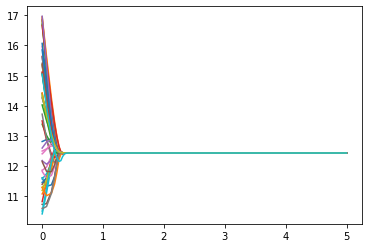

In [145]:
pos = solution.y[:x_upper_bound]
vel = solution.y[v_lower_bound:]

times= solution.t

print(vel[:,steps-1])

vel=vel.reshape((birds, ndim, len(times)))
print(vel[:,:, steps-1])

norm_vel = np.zeros((birds, len(times)))
for i in range(birds):
    for t in range(len(times)):
        norm_vel[i, t] = np.linalg.norm(vel[i, :, t])

        
        
for i in range(birds):
    plt.plot(times, norm_vel[i,:])
